# Clustering locations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import folium
from folium import plugins
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

In [2]:
train2=pd.read_csv(r"C:\Users\이준호\Desktop\Kaggle\taxi\train2.csv",header=0)
train2['trip_spead']=train2['trip_distance']/train2['trip_duration_in_hour']
train2.head(2)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_date  \
0         40.765602                  N            455  2016-03-14   
1         40.731152                  N            663  2016-06-12   

   pickup_hour pickup_day_week dropoff_date  dropoff_hour dropoff_day_week  \
0           17          Monday   2016-03-14            17           Monday   
1            0          Sunday   2016-06-12             0           Sunday   

   trip_duration_in_hour  trip_distance  trip_spead  
0               0.126389       1.498991   11.860150  
1               0.184167       1.806074    9.806736

## 1. Overview

### (1) Pickup locations

Text(0, 0.5, 'latitude')

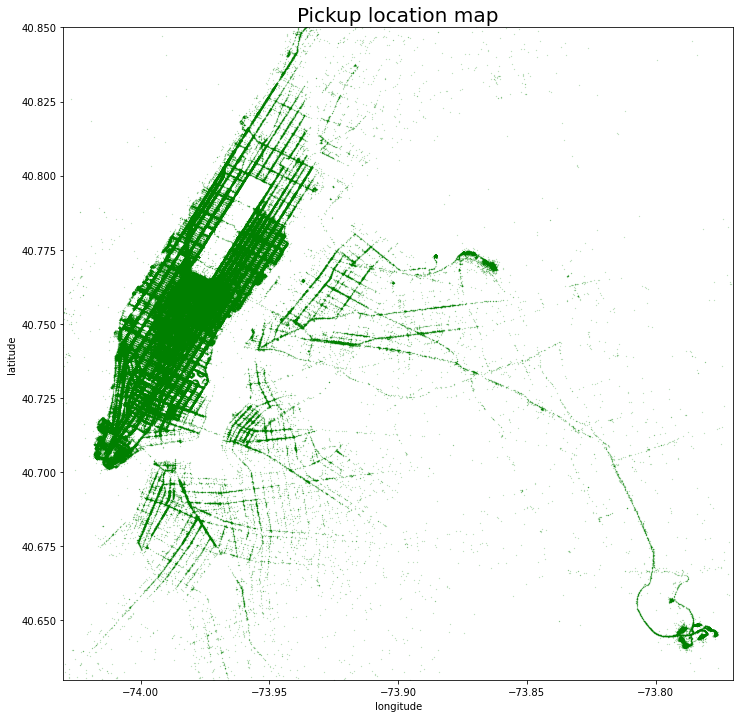

In [3]:
plt.figure(figsize=(12,12))
plt.xlim([-74.03, -73.77]); plt.ylim([40.63, 40.85])
plt.plot(train2['pickup_longitude'].values,train2['pickup_latitude'].values, '.',color='g',alpha=0.5,markersize=0.4)
plt.title('Pickup location map', fontsize=20); plt.xlabel('longitude');plt.ylabel('latitude')

### (2) Dropoff locations

Text(0, 0.5, 'latitude')

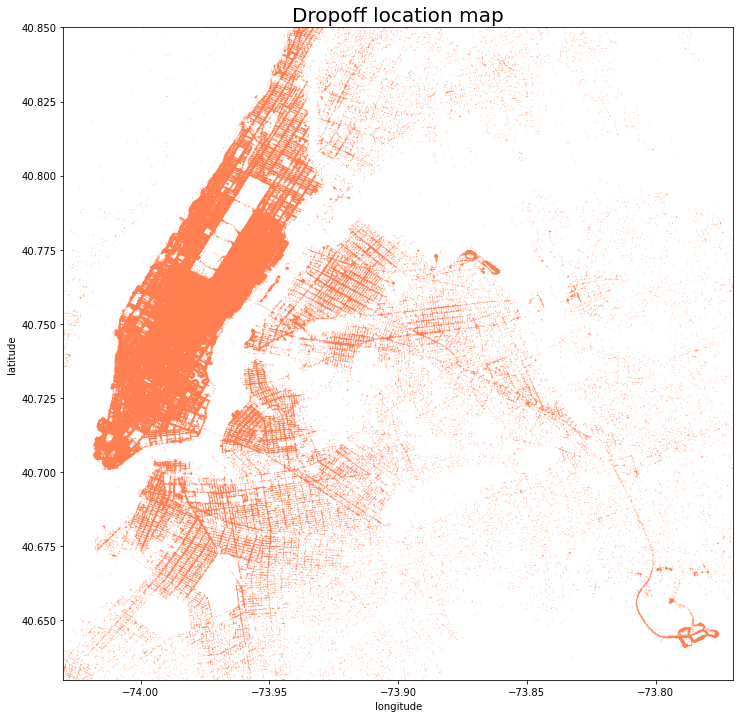

In [4]:
plt.figure(figsize=(12,12))
plt.xlim([-74.03, -73.77]); plt.ylim([40.63, 40.85])
plt.plot(train2['dropoff_longitude'].values,train2['dropoff_latitude'].values, '.',color='coral',alpha=0.5,markersize=0.4)
plt.title('Dropoff location map', fontsize=20);plt.xlabel('longitude');plt.ylabel('latitude')

## 2. Remove Outliers for clustering

In [5]:
xlim=[-74.03, -73.77]; ylim=[40.63, 40.85]
train2=train2[(train2.pickup_longitude>xlim[0]) & (train2.pickup_longitude<xlim[1])]
train2=train2[(train2.dropoff_longitude>xlim[0]) & (train2.dropoff_longitude<xlim[1])]
train2=train2[(train2.pickup_latitude>ylim[0]) & (train2.pickup_latitude<ylim[1])]
train2=train2[(train2.dropoff_latitude>ylim[0]) & (train2.dropoff_latitude<ylim[1])]
train2.shape

(1438626, 20)

## 3. Clustering

In [6]:
pickup_location=train2[['pickup_longitude','pickup_latitude']]
dropoff_location=train2[['dropoff_longitude','dropoff_latitude']]

### (1) Pickup location clustering

In [7]:
sum_squared_dist=[]
K=range(1,11)
for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init=10)
    model.fit(pickup_location)
    sum_squared_dist.append(model.inertia_)

**Find an elbow point**

In [8]:
from kneed import KneeLocator
kn = KneeLocator(range(1,11), sum_squared_dist, curve='convex', direction='decreasing')
print(kn.knee)

4


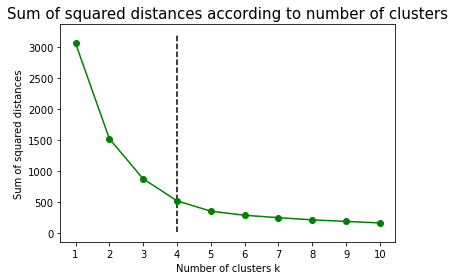

In [9]:
plt.figure(figsize=(6,4))
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(range(1,11), sum_squared_dist, 'o-',color='green')
plt.title('Sum of squared distances according to number of clusters', fontsize=15); plt.xticks(range(1,11))
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

**Graph cluster results**

In [10]:
pickup_location['cluster']=model.labels_
pickup_location

pickup_longitude  pickup_latitude  cluster
0              -73.982155        40.767937        0
1              -73.980415        40.738564        8
2              -73.979027        40.763939        0
3              -74.010040        40.719971        2
4              -73.973053        40.793209        4
...                   ...              ...      ...
1458639        -73.982201        40.745522        9
1458640        -74.000946        40.747379        9
1458641        -73.959129        40.768799        6
1458642        -73.982079        40.749062        5
1458643        -73.979538        40.781750        0

[1438626 rows x 3 columns]

**Dropoff Cluster Information** <br>
+ Cluster 0: Upper West side
+ Cluster 1: Brooklyn
+ Cluster 2: Financial District
+ Cluster 3: JFK Airport
+ Cluster 4: Harlem + Upper Manhatten
+ Cluster 5: Midtwon Manhatten 1
+ Cluster 6: Upper East side
+ Cluster 7: LuGuardia Airpot
+ Cluster 8: Lower Manhatten
+ Cluster 9: Midtwon Manhatten 2

Text(0.5, 1.0, 'Pickup location Clusters with centers')

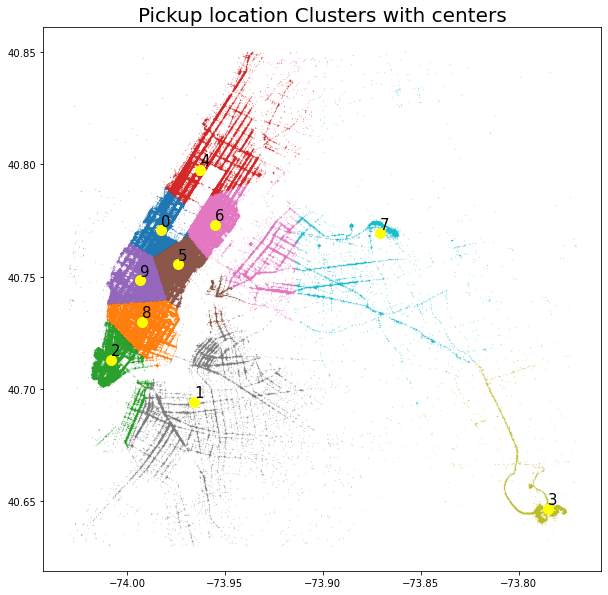

In [11]:
plt.figure(figsize=(10,10))

for c in pickup_location.cluster.unique():
    plt.plot(pickup_location.pickup_longitude[pickup_location['cluster']==c],
             pickup_location.pickup_latitude[pickup_location['cluster']==c], '.',alpha=0.5,markersize=0.4)
    plt.plot(model.cluster_centers_[c][0],model.cluster_centers_[c][1],'o',color='yellow',markersize=10)
    plt.annotate(c,(model.cluster_centers_[c][0],model.cluster_centers_[c][1]+0.002),fontsize=15)
plt.title('Pickup location Clusters with centers',fontsize=20)

In [12]:
pickup_location.groupby('cluster')['pickup_longitude'].count().reset_index().sort_values('pickup_longitude',ascending=False)

cluster  pickup_longitude
9        9            285128
5        5            272318
8        8            242736
6        6            199786
0        0            173820
2        2             89939
4        4             82793
7        7             40461
3        3             30255
1        1             21390

### (2) Dropoff location clustering

In [13]:
sum_squared_dist=[]
K=range(1,11)
for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init=10)
    model.fit(dropoff_location)
    sum_squared_dist.append(model.inertia_)

In [14]:
kn = KneeLocator(range(1,11), sum_squared_dist, curve='convex', direction='decreasing')
print(kn.knee)

3


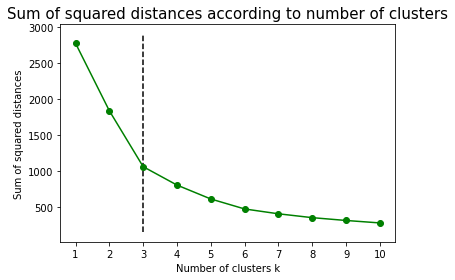

In [15]:
plt.figure(figsize=(6,4))
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(range(1,11), sum_squared_dist, 'o-',color='green')
plt.title('Sum of squared distances according to number of clusters', fontsize=15); plt.xticks(range(1,11))
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [16]:
dropoff_location['cluster']=model.labels_
dropoff_location

dropoff_longitude  dropoff_latitude  cluster
0               -73.964630         40.765602        2
1               -73.999481         40.731152        6
2               -74.005333         40.710087        5
3               -74.012268         40.706718        5
4               -73.972923         40.782520        0
...                    ...               ...      ...
1458639         -73.994911         40.740170        6
1458640         -73.970184         40.796547        0
1458641         -74.004433         40.707371        5
1458642         -73.974632         40.757107        9
1458643         -73.972809         40.790585        0

[1438626 rows x 3 columns]

**Dropoff Cluster Information** <br>
+ Cluster 0: Upper West side
+ Cluster 1: LaGuardia
+ Cluster 2: Upper East side
+ Cluster 3: Upper Brooklyn
+ Cluster 4: JFK Airport
+ Cluster 5: Lower ManLhatten
+ Cluster 6: Midtown Manhatten (smaller one)
+ Cluster 7: Harlem
+ Cluster 8: Lower Brooklyn
+ Cluster 9: Midtown Manhatten (Time square)

Text(0.5, 1.0, 'Dropoff location Clusters with centers')

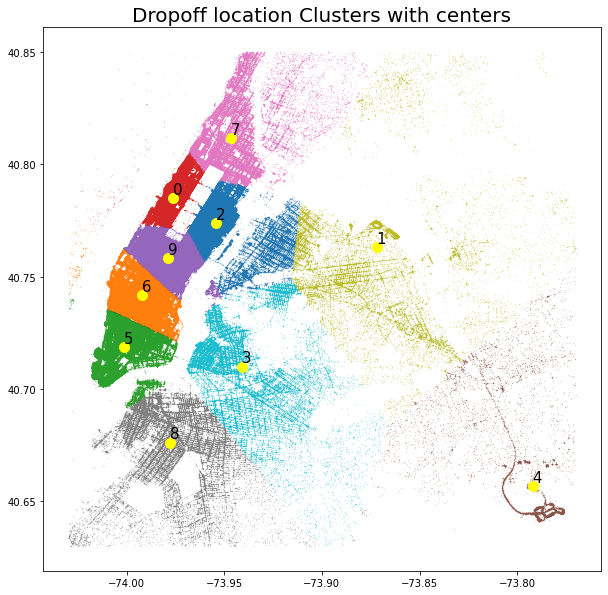

In [17]:
plt.figure(figsize=(10,10))

for c in dropoff_location.cluster.unique():
    plt.plot(dropoff_location.dropoff_longitude[dropoff_location['cluster']==c],
             dropoff_location.dropoff_latitude[dropoff_location['cluster']==c], '.',alpha=0.5,markersize=0.4)
    plt.plot(model.cluster_centers_[c][0],model.cluster_centers_[c][1],'o',color='yellow',markersize=10)
    plt.annotate(c,(model.cluster_centers_[c][0],model.cluster_centers_[c][1]+0.002),fontsize=15)
plt.title('Dropoff location Clusters with centers',fontsize=20)

In [18]:
dropoff_location.groupby('cluster')['dropoff_longitude'].count().reset_index().sort_values('dropoff_longitude',ascending=False)

cluster  dropoff_longitude
9        9             391230
6        6             340527
2        2             220303
5        5             182414
0        0             116708
7        7              60211
8        8              37495
1        1              36732
3        3              36405
4        4              16601

### (3) Final Clustering (Picku+Dropoff)

### 1) Create data with pickup & dropoff locations

In [35]:
latitude=list(train2['pickup_latitude'])+list(train2['dropoff_latitude'])
longitude=list(train2['pickup_longitude'])+list(train2['dropoff_longitude'])

In [36]:
# Creat  'location' data
location=pd.DataFrame()
location['longitude']=longitude
location['latitude']=latitude
location

longitude   latitude
0       -73.982155  40.767937
1       -73.980415  40.738564
2       -73.979027  40.763939
3       -74.010040  40.719971
4       -73.973053  40.793209
...            ...        ...
2877247 -73.994911  40.740170
2877248 -73.970184  40.796547
2877249 -74.004433  40.707371
2877250 -73.974632  40.757107
2877251 -73.972809  40.790585

[2877252 rows x 2 columns]

### 2) Clustering (KMeans method)

In [37]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
kmeans.fit(location)
location['cluster']=kmeans.labels_

Text(0.5, 1.0, 'Location Clusters with centers')

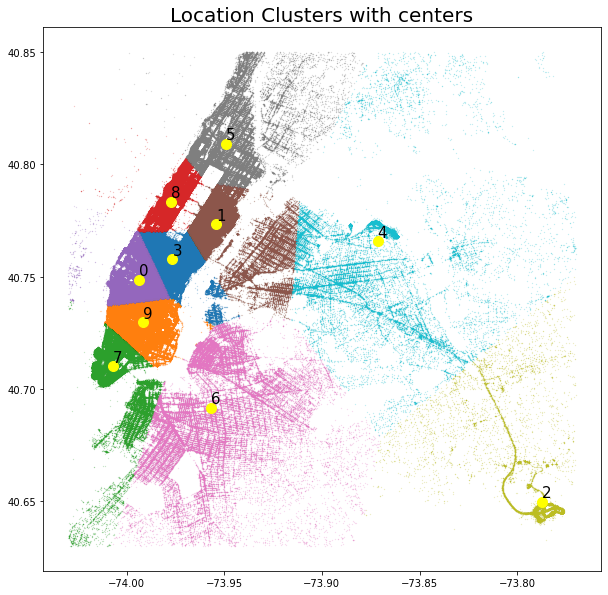

In [39]:
plt.figure(figsize=(10,10))

for c in location.cluster.unique():
    plt.plot(location.longitude[location['cluster']==c],
             location.latitude[location['cluster']==c], '.',alpha=0.5,markersize=0.4)
    plt.plot(kmeans.cluster_centers_[c][0],kmeans.cluster_centers_[c][1],'o',color='yellow',markersize=10)
    plt.annotate(c,(kmeans.cluster_centers_[c][0],kmeans.cluster_centers_[c][1]+0.002),fontsize=15)
plt.title('Location Clusters with centers',fontsize=20)

### 3) Cluster Prediction - Pickup and Dropoff each

In [42]:
train2['pickup_cluster']=kmeans.predict(train2[['pickup_longitude','pickup_latitude']])
train2['dropoff_cluster']=kmeans.predict(train2[['dropoff_longitude','dropoff_latitude']])
train2.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  ...  pickup_hour pickup_day_week  \
0         40.765602                  N  ...           17          Monday   
1         40.731152                  N  ...            0          Sunday   
2         40.710087                  N  ...           11         Tuesday   
3         40.706718                  N  ...           19       Wednesday   
4         40.782520                  N  ...           13        Saturday   

   dropoff_date dropoff_hour dropoff_day_week  trip_duration_in_hour  \
0    2016-03-14           17           Monday               0.126389   
1    2016-06-12            0           Sunday               0.184167   
2    2016-01-19           12          Tuesday               0.590000   
3    2016-04-06           19        Wednesday               0.119167   
4    2016-03-26           13         Saturday               0.120833   

  trip_distance  trip_spead  pickup_cluster  dropoff_cluster  
0      1.498991   11.860150               3                1  
1      1.806074    9.806736               9                9  
2      6.387103   10.825598               3                7  
3      1.485965   12.469634               7                7  
4      1.188962    9.839682               8                8  

[5 rows x 22 columns]

In [64]:
import arrow
from matplotlib import animation

In [141]:
clusters=pd.DataFrame()
clusters['x']=kmeans.cluster_centers_[:,0]
clusters['y']=kmeans.cluster_centers_[:,1]
clusters['labels']=range(len(clusters))

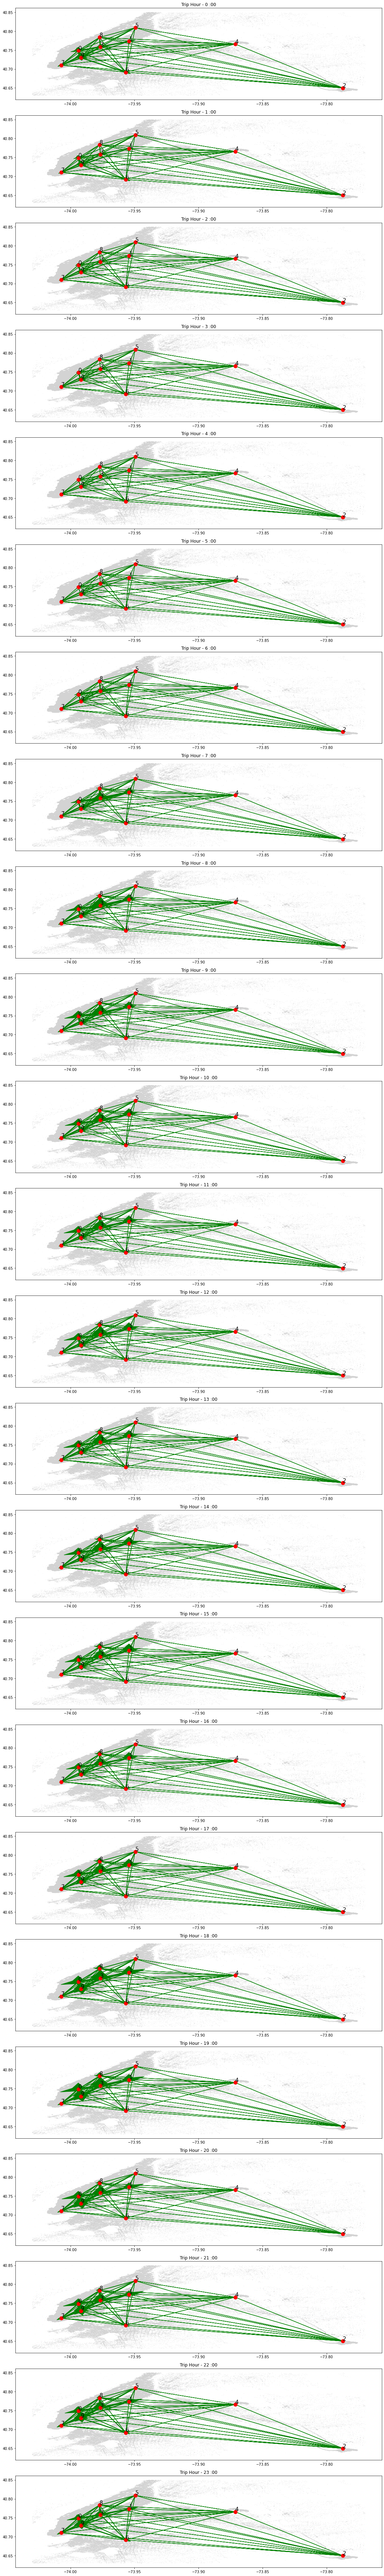

In [151]:
fig, axs = plt.subplots(24, 1,figsize=(15,100))

hour=len(train2['pickup_hour'].unique())
for i in range(hour):
    axs[i].set_title('Trip Hour - ' + str(int(i)) + ' :00')
    for c in location.cluster.unique():
        axs[i].plot(location.longitude[location['cluster']==c],
             location.latitude[location['cluster']==c], '.',alpha=0.5,markersize=0.4,color='lightgrey',zorder=1)
        axs[i].plot(kmeans.cluster_centers_[c][0],kmeans.cluster_centers_[c][1],'o',color='red',markersize=10,zorder=3)
        axs[i].annotate(c,(kmeans.cluster_centers_[c][0],kmeans.cluster_centers_[c][1]+0.002),fontsize=15,zorder=3)
            
    for label in clusters.labels.unique():
        for d_label in clusters.labels.unique():
            num_taxi=len(train2[(train2['pickup_cluster']==label) & (train2['dropoff_cluster']==d_label) & (train2['pickup_hour']==i)])
            dist_x=clusters.x[clusters.labels==d_label].values[0]-clusters.x[clusters.labels==label].values[0]
            dist_y=clusters.y[clusters.labels==d_label].values[0]-clusters.y[clusters.labels==label].values[0]
            pct = np.true_divide(num_taxi,len(train2))
            axs[i].arrow(clusters.x[clusters.labels==label].values[0],clusters.y[clusters.labels==label].values[0],
                      dist_x,dist_y,
                      width=pct,color='green',zorder=2)
fig.tight_layout()